In [2]:
import requests

mywebpage_url='https://www.sis.uta.fi/~tojape/' 
#mywebpage_url='https://www.tuni.fi/en/' 
mywebpage_html=requests.get(mywebpage_url) 
#%% Parse the HTML content using beautifulsoup 

import bs4
mywebpage_parsed=bs4.BeautifulSoup(mywebpage_html.content,'html.parser') 
#%% Get the text content of the page 

def getpagetext(parsedpage):    
    # Remove HTML elements that are scripts    
    scriptelements=parsedpage.find_all('script')  
  # Concatenate the text content from all table cells    
    for scriptelement in scriptelements:        
        # Extract this script element from the page.        
        # This changes the page given to this function!        
        scriptelement.extract()    
        pagetext=parsedpage.get_text()    
        return(pagetext) 
    
mywebpage_text=getpagetext(mywebpage_parsed) 
print(mywebpage_text)




Jaakko Peltonen














Jaakko Peltonen

I am a professor of statistics (data analysis) at Tampere University,
Faculty 
of Information Technology and Communication Sciences, 
unit of Computing Sciences and 
the statistical data analytics team within the unit.


I am the leader of the 
Statistical Machine Learning and Exploratory Data Analysis (SMiLE) research group
and a member of the 
Academy of Finland Center of Excellence in Game Culture Studies.


I am also a docent (adjunct professor) at Aalto University, 
where I have been a visiting professor at the 
Department of Computer Science,
and where I have been a PI of the 
Probabilistic Machine Learning 
research group; I was previously an academy research fellow at the same department. 
I have a previous webpage at Aalto.

I previously worked at University of Sheffield, 
Sheffield Institute for Translational Neuroscience, 
with Prof. 
Magnus Rattray and 
Prof. Neil Lawrence. 
I am a member of the Centre of Excellence in 
Comp

In [67]:
import numpy as np

def getpageurls(webpage_parsed):    
    # Find elements that are hyperlinks    
    pagelinkelements = webpage_parsed.find_all('a')    
    pageurls = []    
    for pagelink in pagelinkelements:          
        pageurl_isok = 1        
        try:            
            pageurl = pagelink['href']        
        except:            
            pageurl_isok = 0        
        if pageurl_isok == 1:           
            # Check that the url does NOT contain these strings            
            if (pageurl.find('.pdf') != -1) | (pageurl.find('.ps') != -1):                
                pageurl_isok = 0            
            # Check that the url DOES contain these strings            
            if (pageurl.find('http') == -1) | (pageurl.find('.fi') == -1):                
                pageurl_isok = 0   
        # (new 1) uniqeness check before adding url in list
        if pageurl_isok == 1 and pageurl not in pageurls:
            pageurls.append(pageurl)
    return(pageurls)

mywebpage_urls = getpageurls(mywebpage_parsed) 

In [114]:
def basicwebcrawler(seedpage_url, maxpages, max_urls_per_page=6) :
    # Store URLs crawled and their text content 
    num_pages_crawled = 0 
    crawled_urls = np.array([])
    crawled_texts = []
    extra_urls = []
    # Remaining pages to crawl: start from a seed page URL
    pagestocrawl = np.array([seedpage_url])
    # Process remaining pages until a desired number
    # of pages have been found
    while (num_pages_crawled < maxpages) and (len(pagestocrawl) > 0):
    # Retrieve the topmost remaining page and parse it
        pagetocrawl_url = pagestocrawl[0]
        print('Getting page: ')
        print(pagetocrawl_url)
        try:
            pagetocrawl_html = requests.get(pagetocrawl_url)
        except:
            pagestocrawl = pagestocrawl[1:]
            continue
        pagetocrawl_parsed = bs4.BeautifulSoup(pagetocrawl_html.content, 'html.parser')
        # Get the text and URLs of the page
        pagetocrawl_text = getpagetext(pagetocrawl_parsed) 
        pagetocrawl_urls = getpageurls(pagetocrawl_parsed)
        
        # (new 2) solving the problem of high number of urls on one page
        # (new 2) firsly, check if the number of urls on this page is greater than the max number of urls per page
        # (new 2) (this number can be chosen in parameters)
        if len(pagetocrawl_urls) > max_urls_per_page:
            # (new 2) random shuffling of urls on this page
            np.random.shuffle(pagetocrawl_urls)
            # (new 2) choosing as many as possible and save these urls in variable
            pagetocrawl_urls = pagetocrawl_urls[:max_urls_per_page]
            # (new 2) saving extra urls in case if the urls run out from pagetocrawl, 
            # (new 2) but there are still remain pages (maxpages is not reached)
            extra_urls.append(pagetocrawl_urls[max_urls_per_page:])
            
        # Store the URL and content of the processed page
        num_pages_crawled = num_pages_crawled + 1 
        crawled_urls = np.append(crawled_urls, pagetocrawl_url)
        crawled_urls = np.unique(crawled_urls)
        crawled_texts.append(pagetocrawl_text)
        # Remove the processed page from remaining pages,
        # but add the new URLs
        
        # (new 1) saving the current crawled url 
        old_page = pagestocrawl[0]
        # (new 1) add new urls, then choosing only unique urls and saving it to pagestocrawl
        # (new 1) (we need to do this without removing the current url because the current url could be present in added urls (pagetocrawl_urls))
        pagestocrawl = np.unique(np.append(pagestocrawl, pagetocrawl_urls))
        # (new 1) removing the last crawled url
        pagestocrawl = pagestocrawl[pagestocrawl != old_page]
        
        # (new 2) in case if max number of pages is not reached and we need extra urls of page to crawl 
        if len(pagestocrawl) == 0 and num_pages_crawled < maxpages:
            pagestocrawl = np.unique(np.array(extra_urls))
            extra_urls = []
        
    return(crawled_urls,crawled_texts)

mycrawled_urls_and_texts = basicwebcrawler('https://www.gutenberg.org/browse/scores/top#books-last30', 20)
mycrawled_urls = mycrawled_urls_and_texts[0] 
mycrawled_texts = mycrawled_urls_and_texts[1]

Getting page: 
https://www.gutenberg.org/browse/scores/top#books-last30


In [132]:
book_html = requests.get('https://www.gutenberg.org/ebooks/145')
a = str(book_html.content).split('\\n')
for el in a:
    name_of_book_el = '<meta name="title" content="'
    if name_of_book_el in el:
        print(el.replace(name_of_book_el, '').replace('">', ''))

Middlemarch by George Eliot


In [173]:
webpage_html = requests.get('https://www.gutenberg.org/browse/scores/top')

In [197]:
import re
import nltk

In [227]:
def top_k_books_crawled(k=20):
    webpage_html = requests.get('https://www.gutenberg.org/browse/scores/top')
    webpage_parsed = bs4.BeautifulSoup(book_html.content, 'html.parser')
    webpage_tops = str(webpage_parsed).split('</div>\n<h2 id="books-last30">Top 100 EBooks last 30 days</h2>\n<ol>')[1]
    webpage_tops = str(webpage_tops).split('<a href="#books-last1">')[0]
    webpage_tops = str(webpage_tops).split('<a href=')[1:]


    num_of_book = 0
    name_books = []
    url_books = []

    books_text = []

    for book in webpage_tops[:k]:
        # finding the id of the book (for url) by special split of the book's line in html
        book_id = str(book.split('">')[0][1:]).split('/ebooks')[1]
    
        # so book url = same link part + id. then add url to list
        book_url = 'https://www.gutenberg.org/ebook' + book_id
        url_books.append(book_url)
    
        # finding name of the book by spatial split of the book's line in html
        book_name = str(str(book.split('">')[1]).split('</a>')[0]).split(' (')[0]
        name_books.append(book_name)
    
        book_url_txt = 'https://www.gutenberg.org/files' + book_id + book_id + '-0.txt'
        book_url_txt_html = requests.get(book_url_txt)
    
        book_text = bs4.BeautifulSoup(book_url_txt_html.content,'html.parser') 
    
        book_text = ' '.join(str(book_text).split())
        books_text.append(book_text)
    
    return name_books, url_books, books_text
    

In [260]:
names, urls, texts = top_k_books_crawled()

In [251]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 
nltk.download('wordnet') 
nltk.download('omw-1.4')
lemmatizer=nltk.stem.WordNetLemmatizer() 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vera\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Vera\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Vera\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Vera\AppData\Roaming\nltk_data...


In [261]:
def tokenize_text(texts):
    
    mycrawled_nltktexts = []
    for k in range(len(texts)):        
        temp_tokenizedtext = nltk.word_tokenize(texts[k])    
        temp_nltktext = nltk.Text(temp_tokenizedtext)    
        mycrawled_nltktexts.append(temp_nltktext)
        
    return mycrawled_nltktexts


In [262]:
tokenized_text = tokenize_text(texts)

In [264]:
mycrawled_lowercasetexts = [] 

for k in range(len(tokenized_text)):       
    temp_lowercasetext = []    
    for l in range(len(tokenized_text[k])):        
        lowercaseword = tokenized_text[k][l].lower()        
        temp_lowercasetext.append(lowercaseword)    
    temp_lowercasetest = nltk.Text(temp_lowercasetext)    
    mycrawled_lowercasetexts.append(temp_lowercasetext)


In [265]:
def tagtowordnet(postag):   
    wordnettag = -1   
    if postag[0] == 'N':        
        wordnettag = 'n'   
    elif postag[0] == 'V':        
        wordnettag = 'v'   
    elif postag[0] == 'J':        
        wordnettag = 'a'    
    elif postag[0] == 'R':        
        wordnettag = 'r'    
    return(wordnettag)

In [266]:
def lemmatizetext(nltktexttolemmatize):    
    # Tag the text with POS tags    
    taggedtext = nltk.pos_tag(nltktexttolemmatize)   
    # Lemmatize each word text    
    lemmatizedtext = []    
    for l in range(len(taggedtext)):       
        # Lemmatize a word using the WordNet converted POS tag       
        wordtolemmatize = taggedtext[l][0]        
        wordnettag = tagtowordnet(taggedtext[l][1])        
        if wordnettag != -1:            
            lemmatizedword = lemmatizer.lemmatize(wordtolemmatize,wordnettag)        
        else:            
            lemmatizedword=wordtolemmatize       
            # Store the lemmatized word        
        lemmatizedtext.append(lemmatizedword)    
    return(lemmatizedtext) 

mycrawled_lemmatizedtexts = [] 

for k in range(len(mycrawled_lowercasetexts)):    
    lemmatizedtext = lemmatizetext(mycrawled_lowercasetexts[k])    
    lemmatizedtext = nltk.Text(lemmatizedtext)    
    mycrawled_lemmatizedtexts.append(lemmatizedtext)

In [267]:
myvocabularies = [] 
myindices_in_vocabularies = []
# Find the vocabulary of each document 
for k in range(len(mycrawled_lemmatizedtexts)):   
    # Get unique words and where they occur    
    temptext = mycrawled_lemmatizedtexts[k]    
    uniqueresults = np.unique(temptext,return_inverse=True)    
    uniquewords = uniqueresults[0]    
    wordindices = uniqueresults[1]    
    # Store the vocabulary and indices of document words in it    
    myvocabularies.append(uniquewords)    
    myindices_in_vocabularies.append(wordindices) 

In [268]:
tempvocabulary=[]  
for k in range(len(mycrawled_lemmatizedtexts)):   
    tempvocabulary.extend(myvocabularies[k]) 
    # Find the unique elements among all vocabularies 
uniqueresults=np.unique(tempvocabulary,return_inverse=True) 
unifiedvocabulary=uniqueresults[0] 
wordindices=uniqueresults[1] 
# Translate previous indices to the unified vocabulary. 
# Must keep track where each vocabulary started in 
# the concatenated one. 
vocabularystart=0 
myindices_in_unifiedvocabulary=[] 
for k in range(len(mycrawled_lemmatizedtexts)):    
    # In order to shift word indices, we must temporarily    
    # change their data type to a Numpy array    
    tempindices=np.array(myindices_in_vocabularies[k])    
    tempindices=tempindices+vocabularystart    
    tempindices=wordindices[tempindices]    
    myindices_in_unifiedvocabulary.append(tempindices)    
    vocabularystart=vocabularystart+len(myvocabularies[k])

In [273]:
print(unifiedvocabulary[:100])
print(len(myindices_in_unifiedvocabulary[2][:100]))

['!' '#' '$' '%' '&' "'" "''" "'20" "'50" "'_dos" "'_none_" "'ad" "'after"
 "'all" "'an'some" "'and" "'ands" "'ard" "'are" "'arf-quid" "'arm"
 "'armony" "'art" "'as" "'as-is" "'at" "'ave" "'avin" "'bacca-box"
 "'behold" "'bersicker" "'bloody" "'bloofer" "'bloomin" "'bus" "'but"
 "'buy" "'check" "'chicken-feed" "'cissy" "'come" "'d" "'damn" "'dear"
 "'death's-head" "'despair" "'doss" "'drink" "'ead" "'eard" "'edges"
 "'ell" "'elped" "'em" "'ere" "'experience" "'first" "'for" "'fore"
 "'give" "'go" "'ha" "'he" "'health" "'here" "'his" "'if" "'igh" "'im"
 "'is" "'isself" "'it" "'ittin" "'jever" "'keeper" "'know" "'land"
 "'little" "'ll" "'lo" "'look" "'lor" "'lord" "'love" "'lucy" "'m" "'may"
 "'maybe" "'miss" "'mother" "'mr." "'my" "'n" "'never" "'no" "'none"
 "'not" "'of" "'oh" "'old"]
100


In [292]:
for name in names:
    print(name)

A Room with a View by E. M.  Forster \\
Middlemarch by George Eliot \\
Little Women; Or, Meg, Jo, Beth, and Amy by Louisa May Alcott \\
The Enchanted April by Elizabeth Von Arnim \\
The Blue Castle: a novel by L. M.  Montgomery \\
Cranford by Elizabeth Cleghorn Gaskell \\
Pride and Prejudice by Jane Austen \\
Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley \\
The Yellow Wallpaper by Charlotte Perkins Gilman \\
The Adventures of Sherlock Holmes by Arthur Conan Doyle \\
Dracula by Bram Stoker \\
Alice's Adventures in Wonderland by Lewis Carroll \\
The Scarlet Letter by Nathaniel Hawthorne \\
Moby Dick; Or, The Whale by Herman Melville \\
The Picture of Dorian Gray by Oscar Wilde \\
A Modest Proposal by Jonathan Swift \\
A Tale of Two Cities by Charles Dickens \\
The Strange Case of Dr. Jekyll and Mr. Hyde by Robert Louis Stevenson \\
The Great Gatsby by F. Scott  Fitzgerald \\
A Doll's House : a play by Henrik Ibsen \\


In [293]:
for url in urls:
    print(url, '\\\\')

https://www.gutenberg.org/ebook/2641 \\
https://www.gutenberg.org/ebook/145 \\
https://www.gutenberg.org/ebook/37106 \\
https://www.gutenberg.org/ebook/16389 \\
https://www.gutenberg.org/ebook/67979 \\
https://www.gutenberg.org/ebook/394 \\
https://www.gutenberg.org/ebook/1342 \\
https://www.gutenberg.org/ebook/84 \\
https://www.gutenberg.org/ebook/1952 \\
https://www.gutenberg.org/ebook/1661 \\
https://www.gutenberg.org/ebook/345 \\
https://www.gutenberg.org/ebook/11 \\
https://www.gutenberg.org/ebook/25344 \\
https://www.gutenberg.org/ebook/2701 \\
https://www.gutenberg.org/ebook/174 \\
https://www.gutenberg.org/ebook/1080 \\
https://www.gutenberg.org/ebook/98 \\
https://www.gutenberg.org/ebook/43 \\
https://www.gutenberg.org/ebook/64317 \\
https://www.gutenberg.org/ebook/2542 \\


In [284]:
unifiedvocabulary_totaloccurrencecounts=np.zeros((len(unifiedvocabulary),1)) 

for k in range(len(mycrawled_lemmatizedtexts)):   
    occurrencecounts=np.zeros((len(unifiedvocabulary),1))    
    for l in range(len(myindices_in_unifiedvocabulary[k])):        
        occurrencecounts[myindices_in_unifiedvocabulary[k][l]]= \
        occurrencecounts[myindices_in_unifiedvocabulary[k][l]]+1    
    unifiedvocabulary_totaloccurrencecounts= \
    unifiedvocabulary_totaloccurrencecounts+occurrencecounts   

In [294]:
highest_totaloccurrences_indices = np.argsort(\
                                               -1*unifiedvocabulary_totaloccurrencecounts,axis=0) 
top_100 = np.squeeze(unifiedvocabulary[\
                                      highest_totaloccurrences_indices[1:100]])

print(top_100)

['the' '.' 'be' 'and' 'of' 'to' 'a' 'i' 'have' 'in' 'that' '“' 'it' '”'
 'he' 'you' 'his' '’' 'her' 'with' ';' 'she' 'as' 'not' 'for' 'but' 'at'
 'say' 'on' 'do' 'my' 's' 'him' '?' '!' 'all' 'this' 'me' 'by' 'so'
 'which' 'from' 'there' 'if' 'would' 'or' 'one' 'they' 'no' 'go' 'what'
 'we' 'when' 'an' 'come' 'know' 'mr.' 'will' '--' 'could' 'who' 'make'
 'out' 'see' 'up' 'them' 'look' 'think' 'more' 'very' 'your' 'now' 'some'
 'any' 'into' 'then' 't' 'like' 'their' 'can' "''" ':' 'about' 'take'
 'man' 'little' '``' 'time' 'than' 'must' 'only' 'good' 'other' 'should'
 'before' 'get' 'such' 'well' 'tell']


In [295]:
import matplotlib.pyplot as plt


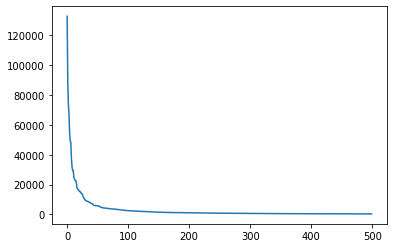

In [308]:
total = np.sum(np.squeeze(\
                            unifiedvocabulary_totaloccurrencecounts[\
                                                                    highest_totaloccurrences_indices]))
occur_freq = highest_totaloccurrences_indices / total

# Plot the top-500 occurrence counts of the words against their ranks 
myfigure, myaxes = plt.subplots(); 
horizontalpositions=range(500) 
verticalpositions=np.squeeze(unifiedvocabulary_totaloccurrencecounts[\
                                                                     highest_totaloccurrences_indices[0:500]])
plt.plot(horizontalpositions,verticalpositions);
